<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports-and-Data-loading" data-toc-modified-id="Imports-and-Data-loading-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports and Data loading</a></span><ul class="toc-item"><li><span><a href="#4.6kW-Chargers" data-toc-modified-id="4.6kW-Chargers-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>4.6kW Chargers</a></span></li><li><span><a href="#3.6kW-Chargers" data-toc-modified-id="3.6kW-Chargers-0.1.2"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>3.6kW Chargers</a></span></li></ul></li></ul></li><li><span><a href="#Real-data-comparison" data-toc-modified-id="Real-data-comparison-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Real data comparison</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#4.6kw-chargers-(only-time-on-chargers-simulated)" data-toc-modified-id="4.6kw-chargers-(only-time-on-chargers-simulated)-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>4.6kw chargers (only time on chargers simulated)</a></span></li></ul></li><li><span><a href="#Plot-differences" data-toc-modified-id="Plot-differences-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plot differences</a></span></li></ul></li><li><span><a href="#Demand-Patterns" data-toc-modified-id="Demand-Patterns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Demand Patterns</a></span><ul class="toc-item"><li><span><a href="#Yearly-rental-patterns" data-toc-modified-id="Yearly-rental-patterns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Yearly rental patterns</a></span></li><li><span><a href="#Weekly-Pattern-of-connected-EVS" data-toc-modified-id="Weekly-Pattern-of-connected-EVS-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Weekly Pattern of connected EVS</a></span></li><li><span><a href="#Daily-Pattern-of-connected-EVS" data-toc-modified-id="Daily-Pattern-of-connected-EVS-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Daily Pattern of connected EVS</a></span></li><li><span><a href="#2.4.-Average-Daily-Pattern" data-toc-modified-id="2.4.-Average-Daily-Pattern-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>2.4. Average Daily Pattern</a></span></li></ul></li></ul></div>

## Imports and Data loading

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from evsim.data import load_car2go_trips, load_car2go_capacity

### 4.6kW Chargers

In [3]:
df_4 = pd.read_csv("../logs/stats-Tobi-4-6.csv", parse_dates=[0], infer_datetime_format=True)
df_4 = df_4.set_index("timestamp")
df_4.describe()

,fleet,fleet_soc,ev_vpp,vpp_soc,vpp_capacity_kw
count,41457.000000,41457.000000,41457.000000,41457.000000,41457.000000
mean,481.135803,78.137203,19.240973,75.357852,88.508474
std,19.596587,4.895319,6.492148,5.771148,29.863879
min,2.000000,38.500000,0.000000,0.000000,0.000000
25%,478.000000,74.990000,15.000000,71.627222,69.000000
50%,484.000000,78.890000,19.000000,75.193333,87.400000
75%,486.000000,81.860000,23.000000,79.017059,105.800000
max,508.000000,88.090000,58.000000,98.070000,266.800000


### 3.6kW Chargers

In [4]:
df_3 = pd.read_csv("../logs/stats-3_6-big.csv", parse_dates=[0], infer_datetime_format=True)
df_3 = df_3.set_index("timestamp")
df_3.describe()

,fleet,fleet_soc,ev_vpp,vpp_soc,vpp_capacity_kw
count,91765.000000,91765.000000,91765.000000,91765.000000,91765.000000
mean,509.876641,71.535893,17.677339,73.367525,63.638420
std,29.599162,4.630735,9.290102,9.033646,33.444367
min,2.000000,38.500000,0.000000,0.000000,0.000000
25%,485.000000,69.030000,11.000000,66.767692,39.600000
50%,531.000000,72.090000,16.000000,72.359070,57.600000
75%,535.000000,74.760000,23.000000,80.022500,82.800000
max,536.000000,83.290000,65.000000,99.840000,234.000000


# Real data comparison

In [5]:
real_cap = load_car2go_capacity()

### 4.6kw chargers (only time on chargers simulated)

In [6]:
real_cap.describe()

,fleet,fleet_soc,rent,rent_soc,charging,charging_soc,vpp,vpp_soc,vpp_capacity_kw
count,95587.000000,95587.000000,95587.000000,95587.000000,95587.000000,95587.000000,95587.000000,95587.000000,95587.000000
mean,509.836756,64.015434,400.922479,65.385682,89.944177,95.172618,18.387417,70.635414,58.858121
std,29.921341,4.528480,58.422446,3.466793,28.044798,3.331757,9.910929,9.046906,31.724883
min,2.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,485.000000,61.663551,365.000000,63.345407,69.000000,93.405168,11.000000,63.924056,35.211000
50%,531.000000,64.807477,408.000000,65.535714,84.000000,95.997869,17.000000,69.526042,54.417000
75%,535.000000,67.242798,443.000000,67.812348,107.000000,97.538572,24.000000,77.239583,76.824000
max,536.000000,73.983209,536.000000,74.186441,206.000000,100.000000,68.000000,95.187500,217.668000


## Plot differences

Average SoC difference: 7.48


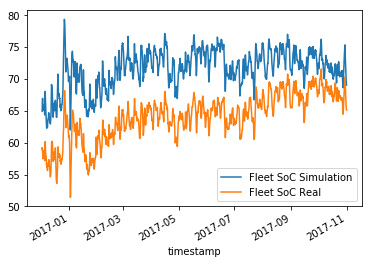

In [7]:
merge = df_3.merge(real_cap, left_index=True, right_index=True, how='left')
merge["fleet_soc_diff"] = merge["fleet_soc_x"] - merge["fleet_soc_y"]
print("Average SoC difference: %.2f" % merge.fleet_soc_diff.mean())

merge = merge.rolling(window=int(1 * 12 * 24)).mean()
ax = merge.plot(y='fleet_soc_x', label='Fleet SoC Simulation')
merge.plot(y='fleet_soc_y', label='Fleet SoC Real', ax=ax)
plt.show()

In [8]:
merge[["fleet_soc_x", "fleet_soc_y"]].head(20)

,fleet_soc_x,fleet_soc_y
timestamp,,
2016-12-01 01:00:00,NaN,NaN
2016-12-01 01:10:00,NaN,NaN
2016-12-01 01:15:00,NaN,NaN
2016-12-01 01:20:00,NaN,NaN
2016-12-01 01:25:00,NaN,NaN
2016-12-01 01:30:00,NaN,NaN
2016-12-01 01:35:00,NaN,NaN
2016-12-01 01:45:00,NaN,NaN
2016-12-01 01:50:00,NaN,NaN


# Demand Patterns

In [9]:
def apply_smoother(df, days):
    DAY = 12*24

    df['vpp_avg'] = df['ev_vpp'].rolling(
        window=int(days*DAY)).mean()
    df['vpp_soc_avg'] = df['vpp_soc'].rolling(
        window=int(days*DAY)).mean()
    df['vpp_capacity_kw_avg'] = df['vpp_capacity_kw'].rolling(
        window=int(days*DAY)).mean()

    return df


def plot(df, title, start="2016-12-1", end="2017-04-28"):
    X = df.loc[start:end][['vpp_avg', 'vpp_soc_avg', 'vpp_capacity_kw_avg']]
    return X.plot(figsize=(12, 4), title=title)

## Yearly rental patterns

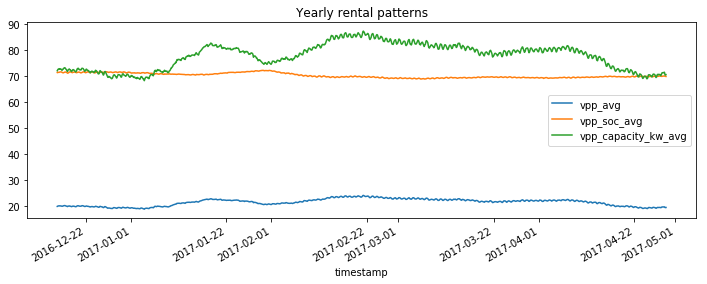

In [10]:
df = apply_smoother(df_3, days=14)
plot(df, "Yearly rental patterns")

## Weekly Pattern of connected EVS

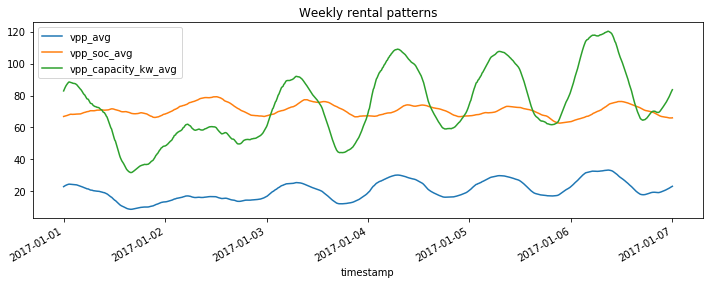

In [11]:
df = apply_smoother(df_3, days=0.5)
plot(df, "Weekly rental patterns", start=datetime(
    2017, 1, 1), end=datetime(2017, 1, 7))

## Daily Pattern of connected EVS

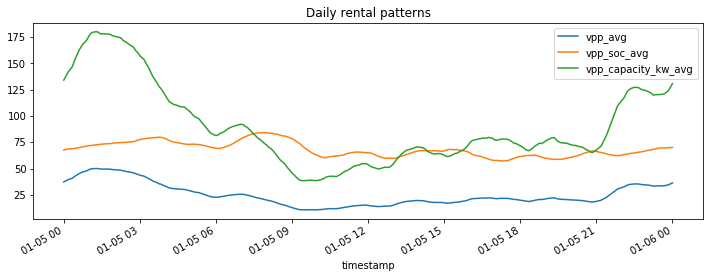

In [12]:
df = apply_smoother(df_3, days=1/24)
plot(df, "Daily rental patterns", start=datetime(
    2017, 1, 5), end=datetime(2017, 1, 6))

## 2.4. Average Daily Pattern

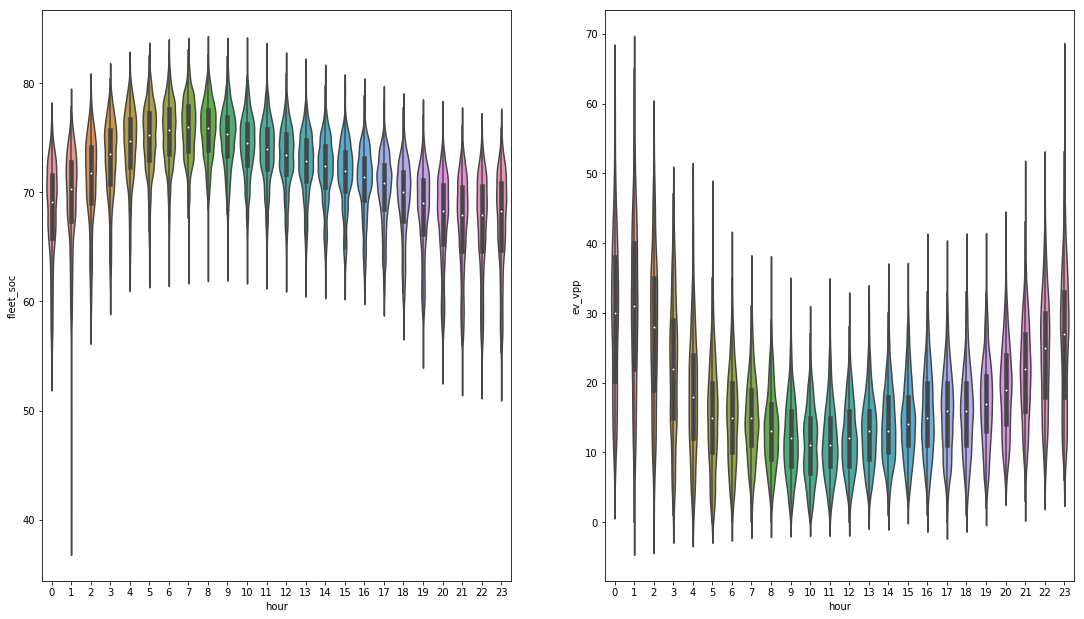

In [13]:
df["hour"] = df.index.hour

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 10.5)
sns.violinplot(x="hour", y="fleet_soc", data=df, ax=ax1)
sns.violinplot(x="hour", y="ev_vpp", data=df, ax=ax2)